In [26]:
# Import thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load data từ thư mục local (điều chỉnh đường dẫn nếu cần)
retail_data = pd.read_excel("../data/Online Retail.xlsx") 

# Xử lý data: Drop NaN ở Quantity và UnitPrice, tạo TotalPrice
retail_data = retail_data.dropna(subset=['Quantity', 'UnitPrice'])
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Giới hạn dữ liệu (10,000 dòng đầu để chạy nhanh, có thể bỏ nếu đủ tài nguyên)
retail_data = retail_data.head(10000)

# Kiểm tra cột
print("Các cột trong dataset:", retail_data.columns)
print("5 dòng đầu:", retail_data.head())

# Kiểm tra NaN trong UnitPrice
if retail_data['UnitPrice'].isna().any():
    print("Cảnh báo: Cột 'UnitPrice' vẫn chứa giá trị NaN. Đã loại bỏ các dòng này.")
    retail_data = retail_data.dropna(subset=['UnitPrice'])

# Kiểm tra data
print(retail_data.head(5))  # Xem 5 dòng đầu
print(retail_data.dtypes)   # Kiểu dữ liệu
print(retail_data.shape)    # Kích thước
print(retail_data.isnull().sum())  # Kiểm tra missing values

Các cột trong dataset: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')
5 dòng đầu:   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [28]:
# Tính trên cột 'UnitPrice'
column = 'UnitPrice'

# Mode (giá trị phổ biến nhất)
mode_value = retail_data[column].value_counts().idxmax()
print("Mode:", mode_value)

# Variance (phương sai)
data_variance = np.var(retail_data[column])
print("Variance:", data_variance)

# Standard Deviation (độ lệch chuẩn)
data_sd = np.std(retail_data[column])
print("Standard Deviation:", data_sd)

# Range (phạm vi: max - min)
data_max = np.max(retail_data[column])
data_min = np.min(retail_data[column])
data_range = data_max - data_min
print("Range:", data_range)

# 60th Percentile (phân vị 60%)
data_percentile = np.percentile(retail_data[column], 60)
print("60th Percentile:", data_percentile)

# 75th Quartile (Q3, phần tư vị 75%)
data_quartile = np.quantile(retail_data[column], 0.75)
print("75th Quartile:", data_quartile)

# IQR (khoảng tứ phân vị)
data_IQR = stats.iqr(retail_data[column])
print("IQR:", data_IQR)

# Thống kê mô tả toàn bộ dataset
print(retail_data.describe())

Mode: 1.25
Variance: 204.75985578226715
Standard Deviation: 14.309432406013425
Range: 887.52
60th Percentile: 2.95
75th Quartile: 4.21
IQR: 2.96
           Quantity                    InvoiceDate     UnitPrice  \
count  10000.000000                          10000  10000.000000   
mean       7.828600  2010-12-03 05:58:26.346000128      3.837412   
min    -9360.000000            2010-12-01 08:26:00      0.000000   
25%        1.000000            2010-12-01 17:06:00      1.250000   
50%        2.000000            2010-12-02 18:08:00      2.510000   
75%        8.000000            2010-12-05 10:45:00      4.210000   
max     2880.000000            2010-12-05 16:24:00    887.520000   
std      104.322417                            NaN     14.310148   

         CustomerID    TotalPrice  
count   7709.000000  10000.000000  
mean   15615.462576     18.066775  
min    12395.000000   -403.200000  
25%    14388.000000      3.300000  
50%    15605.000000      8.420000  
75%    17228.000000     17

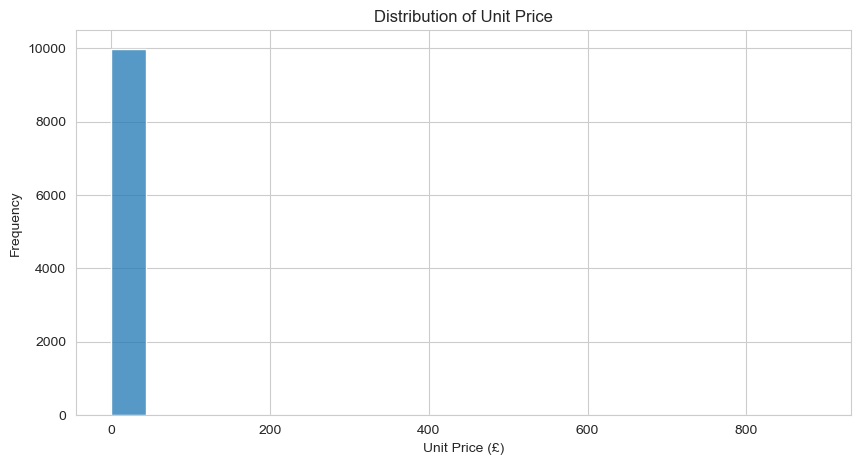

In [29]:
# Set style cho Seaborn
sns.set_style("whitegrid")

# Case 1: Histogram - Phân bố UnitPrice
plt.figure(figsize=(10, 5))
sns.histplot(data=retail_data, x='UnitPrice', bins=20)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price (£)')
plt.ylabel('Frequency')
plt.show()

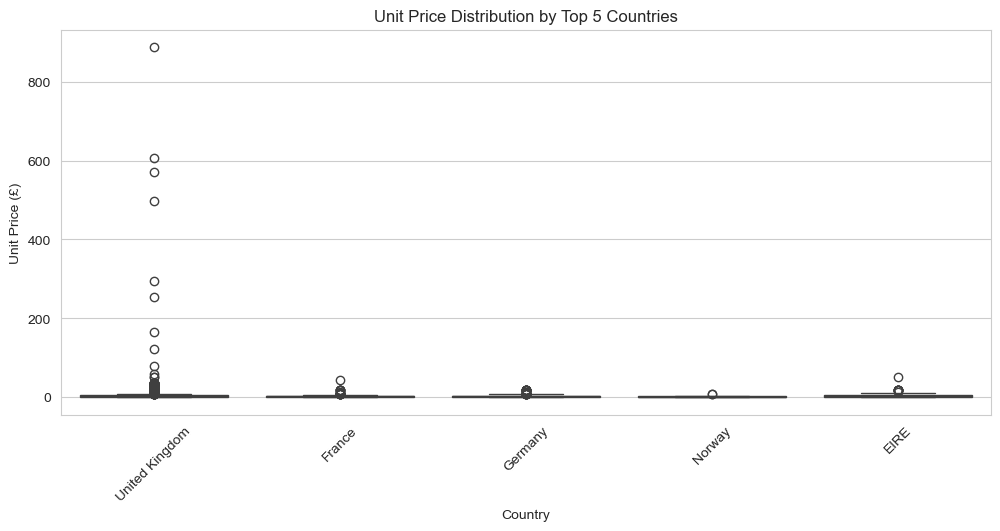

In [30]:
# Case 2: Boxplot - UnitPrice theo Country (giới hạn top 5)
top_countries = retail_data['Country'].value_counts().head(5).index
retail_subset = retail_data[retail_data['Country'].isin(top_countries)]
plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='UnitPrice', data=retail_subset)
plt.title('Unit Price Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Unit Price (£)')
plt.xticks(rotation=45)
plt.show()

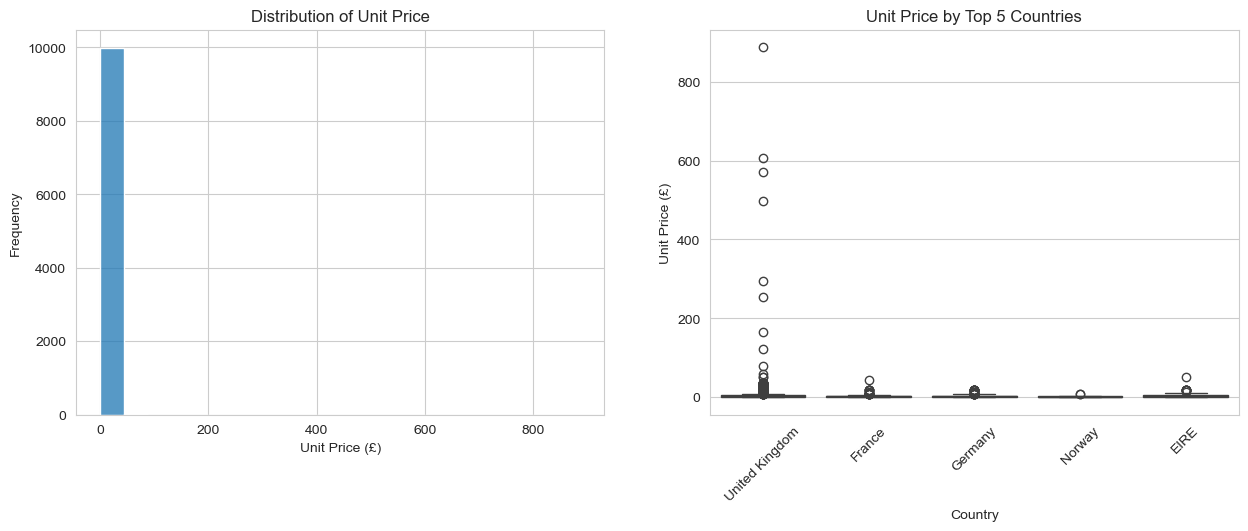

In [31]:
# Case 3: Hai biểu đồ song song
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=retail_data, x='UnitPrice', bins=20, ax=ax1)
ax1.set_title('Distribution of Unit Price')
ax1.set_xlabel('Unit Price (£)')
ax1.set_ylabel('Frequency')

sns.boxplot(x='Country', y='UnitPrice', data=retail_subset, ax=ax2)
ax2.set_title('Unit Price by Top 5 Countries')
ax2.set_xlabel('Country')
ax2.set_ylabel('Unit Price (£)')
ax2.tick_params(axis='x', rotation=45)
plt.show()